# **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
# Download The Pizza Steak Data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip The Data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-01-31 08:04:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   133MB/s    in 0.8s    

2022-01-31 08:04:44 (133 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# **Becoming One With Data**

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os 
# We Walk through pizza_steak Directories and Number of Files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} Directories and {len(filenames)} Images in {dirpath}.")

There are 2 Directories and 0 Images in pizza_steak.
There are 2 Directories and 0 Images in pizza_steak/train.
There are 0 Directories and 750 Images in pizza_steak/train/pizza.
There are 0 Directories and 750 Images in pizza_steak/train/steak.
There are 2 Directories and 0 Images in pizza_steak/test.
There are 0 Directories and 250 Images in pizza_steak/test/pizza.
There are 0 Directories and 250 Images in pizza_steak/test/steak.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 31 08:04 .
drwxr-xr-x 1 root root 4096 Jan 31 08:04 ..
drwxr-xr-x 4 root root 4096 Jan 31 08:04 test
drwxr-xr-x 4 root root 4096 Jan 31 08:04 train


In [8]:
!ls -la pizza_steak/train

total 56
drwxr-xr-x 4 root root  4096 Jan 31 08:04 .
drwxr-xr-x 4 root root  4096 Jan 31 08:04 ..
drwxr-xr-x 2 root root 24576 Jan 31 08:04 pizza
drwxr-xr-x 2 root root 24576 Jan 31 08:04 steak


# **Another Way to find Out images in File**

In [9]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

In [10]:
num_steak_image_train

750

# **To Visualize Images, Lets Get Class Name**

In [11]:
import pathlib 
import numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [12]:
print(class_names)

['pizza' 'steak']


# **Lets Visualize Our Images**

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  
  #Set Up The Directory
  target_folder = target_dir + target_class


  # Get The Random Image  Path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)


  # Read The Image & Plot it Using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])



  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  
  print(f"Image Shape : {img.shape}")

  return img  #The Reason Why We Return Img is that When it passes through mpimg function, it return in the form of array


['3643951.jpg']
Image Shape : (512, 512, 3)


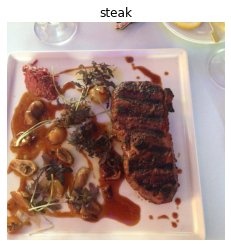

In [14]:
# View Random Image For Training Datasets

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")


# **Lets Visualize Our Images**

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  # Set Up The Directory

  target_folder = target_dir+target_class

  # Get The Random path
  random_image  = random.sample(os.listdir(target_folder), 1)

  # Read The Image and Plot it using Matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f" Image Shape : {img.shape} " )
  return img

 Image Shape : (512, 512, 3) 


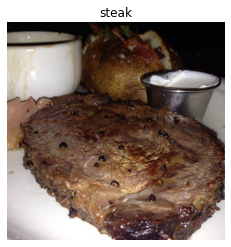

In [16]:
# View Random Images From Training Sets

img = view_random_image(target_dir="pizza_steak/train/", target_class='steak' )

 Image Shape : (512, 512, 3) 


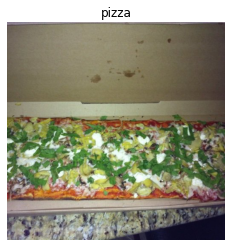

In [17]:
# View Random Images From Training Sets 
img = view_random_image(target_dir="pizza_steak/train/", target_class='pizza')

 Image Shape : (512, 512, 3) 


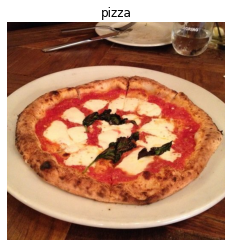

In [18]:
# View Random Images From Test Sets(Steak)

img = view_random_image(target_dir="pizza_steak/test/", target_class='pizza')

 Image Shape : (512, 512, 3) 


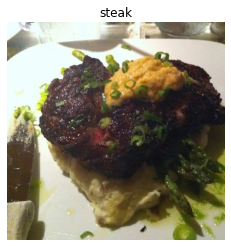

In [19]:
# View Random Images From test DataSets (Steak)

img = view_random_image(target_dir="pizza_steak/test/", target_class='steak')

In [20]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[240, 254, 254],
        [240, 254, 254],
        [240, 254, 254],
        ...,
        [ 80,  60,  36],
        [ 79,  59,  35],
        [ 80,  60,  36]],

       [[240, 254, 254],
        [240, 254, 254],
        [240, 254, 254],
        ...,
        [ 87,  67,  43],
        [ 83,  63,  39],
        [ 81,  61,  37]],

       [[240, 254, 254],
        [240, 254, 254],
        [240, 254, 254],
        ...,
        [ 91,  71,  47],
        [ 84,  64,  40],
        [ 78,  58,  34]],

       ...,

       [[188, 166, 117],
        [190, 170, 120],
        [191, 170, 123],
        ...,
        [180, 180, 172],
        [182, 182, 174],
        [184, 184, 176]],

       [[192, 170, 123],
        [195, 173, 126],
        [196, 175, 128],
        ...,
        [179, 179, 169],
        [181, 181, 173],
        [183, 183, 175]],

       [[197, 175, 128],
        [199, 177, 130],
        [199, 178, 131],
        ...,
        [180, 180, 17

# **Build End To End CNN Model**



*   Load  Our Images
*   Preprocessing Our Images
*   Build A CNN To find Pattern To our Images 
*   Compile Our CNN
*   Fit The CNN To Our Train Data








In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set The Seed
tf.random.set_seed(42)

# PreProcess The Data (Get All Data Between 0 and 1 By Scaling or Normalization )

train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up the path to our Data Directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import Data From Our Directories and Convert it into Batches

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode='binary', seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode='binary', seed=42)


# Build The CNN Model (Same As Tiny VGG on Explainer Website)

model_1= tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                     tf.keras.layers.Conv2D(10,3, activation='relu'),
                                     tf.keras.layers.Conv2D(10,3,activation='relu'),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compile The Model

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy']
              )

# Fit The Model

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 264ms/step - loss: 0.5569 - accuracy: 0.7073 - val_loss: 0.3642 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4166 - accuracy: 0.8193 - val_loss: 0.3555 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3810 - accuracy: 0.8307 - val_loss: 0.3097 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3567 - accuracy: 0.8427 - val_loss: 0.2977 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3112 - accuracy: 0.8760 - val_loss: 0.2984 - val_accuracy: 0.8720


In [22]:
#Before GPU


# Epoch 1/5
# 47/47 [==============================] - 125s 3s/step - loss: 0.5452 - accuracy: 0.7247 - val_loss: 0.3974 - val_accuracy: 0.8360



#After GPU 

# Epoch 1/5
# 47/47 [==============================] - 24s 204ms/step - loss: 0.5578 - accuracy: 0.7007 - val_loss: 0.4054 - val_accuracy: 0.8180


# Look at The Time. That is The Power Of GPU



# **Trying A Non CNN Model**



*   Lets Replicate Same Model But Without Using Image Dataset



In [23]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])


model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.1403 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


# **Try Again With Adding More layers & Epochs**

In [24]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])


model_3.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


history_3 = model_3.fit(train_data, epochs=100, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/100
47/47 [==============================] - 10s 188ms/step - loss: 0.6958 - accuracy: 0.5873 - val_loss: 0.6608 - val_accuracy: 0.5640
Epoch 2/100
47/47 [==============================] - 8s 177ms/step - loss: 0.6282 - accuracy: 0.6720 - val_loss: 0.6080 - val_accuracy: 0.7260
Epoch 3/100
47/47 [==============================] - 8s 176ms/step - loss: 0.5765 - accuracy: 0.7433 - val_loss: 0.5709 - val_accuracy: 0.7400
Epoch 4/100
47/47 [==============================] - 8s 177ms/step - loss: 0.5481 - accuracy: 0.7620 - val_loss: 0.5538 - val_accuracy: 0.7420
Epoch 5/100
47/47 [==============================] - 8s 178ms/step - loss: 0.5512 - accuracy: 0.7433 - val_loss: 0.5379 - val_accuracy: 0.7480
Epoch 6/100
47/47 [==============================] - 8s 179ms/step - loss: 0.5123 - accuracy: 0.7720 - val_loss: 0.5079 - val_accuracy: 0.7740
Epoch 7/100
47/47 [==============================] - 8s 179ms/step - loss: 0.4974 - accuracy: 0.7740 - val_loss: 0.6193 - val_accuracy: 0.704

# **Upgrading The Model**

# Model No 4

In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 2.6638 - accuracy: 0.6193 - val_loss: 1.6957 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.8781 - accuracy: 0.6967 - val_loss: 0.6221 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.8012 - accuracy: 0.6960 - val_loss: 0.6334 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6723 - accuracy: 0.7147 - val_loss: 0.4612 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4909 - accuracy: 0.7800 - val_loss: 0.4805 - val_accuracy: 0.7420


# Model No 5

In [ ]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])


model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer  = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_5 = model_5.fit(train_data, epochs=100, steps_per_epoch= len(train_data), validation_data = valid_data, validation_steps= len(valid_data))

# **Model No 6**

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']

)

history_6 = model_6.fit(train_data, epochs=50, steps_per_epoch= len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/50
47/47 [==============================] - 9s 180ms/step - loss: 2.3788 - accuracy: 0.6220 - val_loss: 1.2081 - val_accuracy: 0.5280
Epoch 2/50
47/47 [==============================] - 8s 174ms/step - loss: 0.7896 - accuracy: 0.6667 - val_loss: 0.5199 - val_accuracy: 0.7380
Epoch 3/50
47/47 [==============================] - 8s 175ms/step - loss: 0.7374 - accuracy: 0.6873 - val_loss: 0.4951 - val_accuracy: 0.7840
Epoch 4/50
47/47 [==============================] - 8s 178ms/step - loss: 0.5438 - accuracy: 0.7647 - val_loss: 0.4479 - val_accuracy: 0.7940
Epoch 5/50
47/47 [==============================] - 8s 176ms/step - loss: 0.5270 - accuracy: 0.7760 - val_loss: 0.5900 - val_accuracy: 0.7420
Epoch 6/50
47/47 [==============================] - 8s 175ms/step - loss: 0.4989 - accuracy: 0.7727 - val_loss: 0.4421 - val_accuracy: 0.7920
Epoch 7/50
47/47 [==============================] - 8s 176ms/step - loss: 0.4314 - accuracy: 0.8033 - val_loss: 0.4247 - val_accuracy: 0.7900
Epoch 

# **Breaking Our CNN Model**

*   Become One With Data
*   Preprocess The Data
*   Created The Model
*   Fit The Model
*   Evaluate The Model
*   Adjust Different Parameters and Improve The Model
* Repeat Until Satisfied




# **Become With Data**

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

# **Preprocess The Data**

*  Split The Data into Training & Test Sets




In [30]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'


In [31]:
# Turn Data Into Batches (Batches is small Subset of datasets. Rather Than took 10,000 images, A model might look 32 at a time)
!nvidia-smi

Mon Jan 31 08:42:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    32W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [32]:
# Create Train and Test Data Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [33]:
# Load in Our Images Data and Turn into Batches

train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode= 'binary', batch_size=32)
test_data = test_datagen.flow_from_directory(directory= test_dir, target_size=(224,224), class_mode='binary', batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Get Samples Of Train Data Batch

images, labels = train_data.next()
    # Get The Next Batch of Images/Labels
len(images), len(labels)

(32, 32)

In [35]:
# How Many Batches Are There

len(train_data)

47

In [36]:
# Get The First Two Images
images[:2]

array([[[[0.7294118 , 0.7019608 , 0.6627451 ],
         [0.7254902 , 0.69803923, 0.65882355],
         [0.73333335, 0.7058824 , 0.6666667 ],
         ...,
         [0.6901961 , 0.627451  , 0.5686275 ],
         [0.69411767, 0.6313726 , 0.57254905],
         [0.7019608 , 0.6392157 , 0.5803922 ]],

        [[0.7294118 , 0.7019608 , 0.6627451 ],
         [0.7294118 , 0.7019608 , 0.6627451 ],
         [0.7411765 , 0.7137255 , 0.6745098 ],
         ...,
         [0.72156864, 0.65882355, 0.59607846],
         [0.7490196 , 0.6862745 , 0.62352943],
         [0.7294118 , 0.6666667 , 0.6039216 ]],

        [[0.73333335, 0.7058824 , 0.6666667 ],
         [0.7490196 , 0.72156864, 0.68235296],
         [0.75294125, 0.7254902 , 0.6862745 ],
         ...,
         [0.7372549 , 0.6745098 , 0.6117647 ],
         [0.75294125, 0.6901961 , 0.627451  ],
         [0.7607844 , 0.69803923, 0.63529414]],

        ...,

        [[0.13333334, 0.05490196, 0.05882353],
         [0.13725491, 0.05882353, 0.0627451 ]

In [37]:
images[0].shape

(224, 224, 3)

In [38]:
images[4].shape

(224, 224, 3)

**In Deep Learning Models, There are almost Infinite Amount Of Architecture You created**

# **Created A CNN Model**

**A Baseline is Relatively Small model or Existing result that you setup when a beginning a machine Experiment, You Try to Beat The Baseline**

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create The Model(This will be Baseliner, A layer in Convolutional Neural Network)

model_7 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile The Model

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


# Fit The Model

history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.9386 - accuracy: 0.7040 - val_loss: 0.4299 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4131 - accuracy: 0.8147 - val_loss: 0.3965 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2877 - accuracy: 0.8940 - val_loss: 0.3860 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1206 - accuracy: 0.9633 - val_loss: 0.4694 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0456 - accuracy: 0.9920 - val_loss: 0.5134 - val_accuracy: 0.7860


# **Little Explanation**

*   **Filter :**(Decides How many Times filters should pass over input tensor. Number of Sliding Window)
*   **Kernal_size :** ( Determines The Shape of Filters over Output)
*   **Padding :** (Pads The target tensors with zeros)
*   **Strides :** (Number of Steps a Filter takes across image at a time)

**In Padding:** (If Padding is Same, its mean Output shape is Same as Input shape. If Valid, Its Mean Output Shape is Compressed)


In [ ]:
# Check The Length of Training and Test Data

len(train_data), len(test_data)

# **Evaluate The Model**

In [ ]:
import pandas as pd
pd.DataFrame(history_7.history).plot(figsize=(10,7))

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,6))

In [ ]:
pd.DataFrame(history_6.history).plot(figsize=(5,5))

# **Plot Validation and Training Curves Seperately**

In [ ]:
def plot_loss_curves(history):

  # Return Seperate Loss Curves For Training and Test Datasets

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot Loss

  plt.plot(epochs,loss, label='Training_Loss')
  plt.plot(epochs,loss, label='Val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,loss, label='Training_accuracy')
  plt.plot(epochs,loss, label='Val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Check Out The Loss And Accuracy Of Models

plot_loss_curves(history_7)

In [ ]:
plot_loss_curves(history_2)

In [ ]:
plot_loss_curves(history_1)

In [ ]:
plot_loss_curves(history_5)

# **Adjust The Model Parameters**


**Note : When a Models Validation loss starts to Increase , It is Likelly Model is Overfitting in Training Datasets**

**fitting a Machine Learning Model Comes in 3 Steps**

1- Create A Baseline

2- Beat Baseline By Overfitting The Large Model

3- Reduce Overfitting

**Ways To Reduce Overfitting**

1-Increase Number Of Convolutional layers

2- Increase Number of Convolutional Filters

3- Add Dense Layers To Output Of our Flattend Layer



**Reduce OverFitting**

(Reduce Overfitting is Also Called Regulization)

1- Add Data Augmentation

2- Add Regulization Layer( Such as Maxpool2D)

3- Add More Data



In [ ]:
# Create The Model . (This is Going to be New Baseline)

model_8 = Sequential([
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])


model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


history_8 = model_8.fit(train_data,epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps= len(valid_data))

In [ ]:
#Plot Loss Curves

plot_loss_curves(history_8)

# **Reduced Overfitting By Data Augmentation**

In [ ]:
# Opening Bags of Tricks & Find Data Augmentation


train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2, 
                                             shear_range= 0.2, zoom_range= 0.2, 
                                             width_shift_range=0.2, height_shift_range=0.3,horizontal_flip=True)



In [52]:
train_datagen_augmented

In [ ]:
# Create Image Datagenerator Without Data Augmentation


train_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_datagen

In [ ]:
# Create ImageDataGenerator Without Data Augmentation For Test Data

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
test_datagen

# **What is Data Augmentation**


**It is the process of Altering Our Training Data Leading To have More Diversity**

In [ ]:
# Import Data and Augmented it From Training Directory

print('Augmented Training Data')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode= 'binary',
                                                                   shuffle=False)


In [ ]:
# Create Non Augmented Data From Data Batches

print('Non Augmented Training Data')

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False
                                               )

In [ ]:
#Create Non Augmented From Data Batches

test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')

**Data Augmented Is Usually Performed On Training Data**

In [ ]:
# Get Samples Batches

images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
# Show Original And Augmented Image

import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
print(f"Showing Image Number : {random_number} ")
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented Image")
plt.axis(False)



# **Train CNN Model For Augmented Train Data**

In [ ]:
model_9 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])

model_9.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

history_9 = model_9.fit(train_data_augmented, epochs=5, steps_per_epoch= len(train_data_augmented), validation_data= test_data, validation_steps = len(test_data))



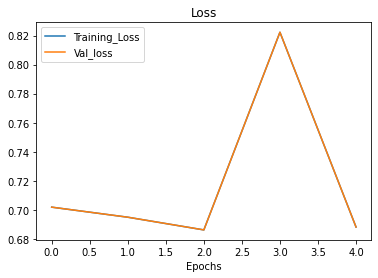

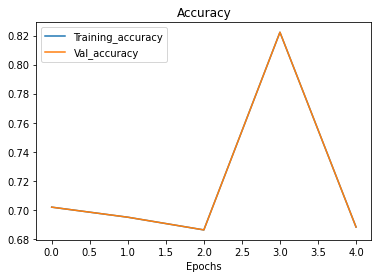

In [63]:
# Check The History

plot_loss_curves(history_9)

# **Lets Shuffle Our Augmented Data**

In [ ]:
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode='binary',
                                                                           batch_size=32,
                                                                           shuffle= False)

# **Created The Model Same As Previous One**

In [ ]:
model_10 = Sequential([
                       Conv2D(10,7, activation='relu', input_shape=(224,224,3)),
                       MaxPool2D(),
                       Conv2D(10,3, activation='relu'),
                       MaxPool2D(),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')
])

model_10.compile(
    loss = 'binary_crossentropy',
    optimizer= Adam(),
    metrics=['accuracy']
)


history_10 = model_10.fit(train_data_augmented_shuffle, epochs=5, steps_per_epoch=len(train_data_augmented_shuffle), 
                          validation_data = test_data, validation_steps = len(test_data))

In [ ]:
#Plot Loss Curves

plot_loss_curves(history_10)

**When Shuffling Training Data, The Model Gets Exposed To all Different Kinds Of Data During Enabling**

# **Repeat Until Satisfied**


**To Improve Our Model**

1- Increase Number Of Model Layers

2- Increase Number Of Filters in Convolutional layers

3- Train For Longer(More Epochs)

4- Find Ideal Learning Rate

5- Get More Data

6- Use Transfer Learning To Leverage What Another Image Model Has Learn

# **Download Custom Image To Make Predictions**

In [ ]:
#Classes We are Working with: 
class_names

In [ ]:
#View Our Example Image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check The Shape Of Image

steak.shape

# **Writing Helper Function To Preprocess The Image**

**When You Train a Neural Network And You want to make a prediction on your custom data , It is Important That custom data is preprocessed into Same Format as Your Model Was Trained on**

In [ ]:
# Create A Function To Import Image and Resize it with our Model

def load_and_prep_image(filename, img_shape=224):
  
  #Read In The Image
  img = tf.io.read_file(filename)

  # Decode Read File In Tensor
  img = tf.image.decode_image(img)

  # Resize The Image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale The Image(Turn it Into 0 and 1)
  img = img/255.
  return img;


In [ ]:
# Load in and Preprocess  our Custom image

steak = load_and_prep_image('03-steak.jpeg')
steak

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
model_10.predict(expanded_steak)

In [ ]:
model_9.predict(expanded_steak)

In [ ]:
model_1.predict(expanded_steak)

In [ ]:
model_5.predict(expanded_steak)

In [77]:
pred = model_10.predict(tf.expand_dims(steak, axis=0))

# **Making Predictions On Custom Images**

In [ ]:
# Remind Ourself for Classnames
class_names

In [ ]:
# We can Index the Predicted Class By Rounding Prediction Probablities

pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

# **Creating Function To Determine Whether it is Pizza/Steak or Not**

In [81]:
def pred_and_plot(model, filename, class_names= class_names):

  #  Import The Target image and Preprocess it

  img = load_and_prep_image(filename)

  # Make A Predictions

  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get The Predicted Class

  pred_class = class_names[int(tf.round(pred))]

  # Plot The Image And Predicted Class

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);



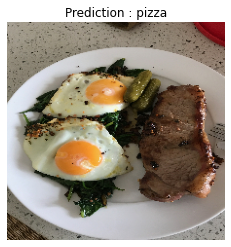

In [82]:
# Test Our Model On Custom Image
pred_and_plot(model_10, '03-steak.jpeg')

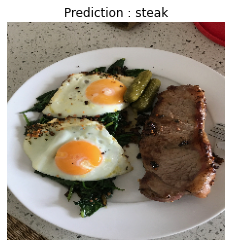

In [83]:
pred_and_plot(model_1,'03-steak.jpeg')

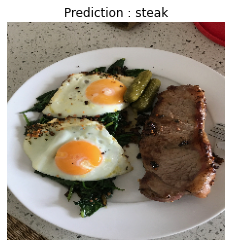

In [84]:
pred_and_plot(model_3, '03-steak.jpeg')

# **Lets Try It With Different Examples Or Pictures**

--2022-01-31 08:47:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-01-31 08:47:54 (39.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



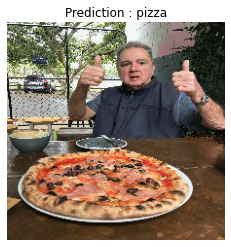

In [85]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_10, '03-pizza-dad.jpeg')

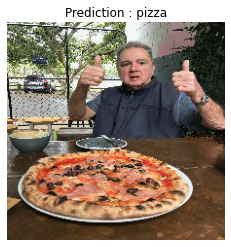

In [86]:
pred_and_plot(model_1, '03-pizza-dad.jpeg')

--2022-01-31 08:47:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2022-01-31 08:47:55 (29.2 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



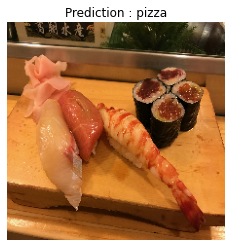

In [87]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
pred_and_plot(model_10, '03-sushi.jpeg')

In [88]:
# !wget /content/03-pizza.jpg
# pred_and_plot(model_10, '03-pizza.jpg')

In [89]:
# !wget /content/03-steak-1.jpg
# pred_and_plot(model_2, '03-steak-1.jpg')

# **Multiclass Class Classification**





*   Become One With Data
*   Preprocess The Data
*   Create A Model(Starts With Baseline)
*   Fit The Model( Overfit it to make Sure It works)
*   Evaluate The Model
*   Adjust Different Hyperparameters & Improve The Model
*   Repeat Untill Satisfied



# **Become One With Data**

In [90]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip Our Data

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-01-31 08:47:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   191MB/s    in 2.6s    

2022-01-31 08:47:58 (191 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk Through 10 Classes of Food Image Data

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)}  images in '{dirpath}' ")

In [92]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Jan 31 08:47 .
drwxr-xr-x  1 root root 4096 Jan 31 08:47 ..
drwxr-xr-x 12 root root 4096 Jan 31 08:47 test
drwxr-xr-x 12 root root 4096 Jan 31 08:47 train


In [93]:
# Setup The Train and Test Data Directories

train_dir = '10_food_classes_all_data/train/'
test_dir  = '10_food_classes_all_data/test/'

In [94]:
# Lets Get Class Name

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


 Image Shape : (306, 512, 3) 


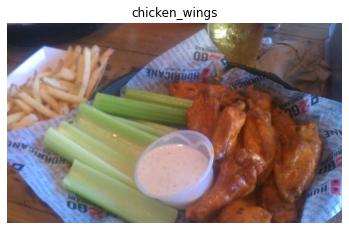

In [95]:
# Visualize # Visualize # Visualize

import random 

img = view_random_image(target_dir= train_dir, target_class = random.choice(class_names))

# **Preprocess The Data**

In [96]:
from keras_preprocessing.image import image_data_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [97]:
#Load Data From Directories and Turn It into Batches

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size = 32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Created A Model (Starts With Baseline)**

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D, Conv2D, Activation

In [101]:
model_11 = Sequential([
                       Conv2D(10,3, input_shape=(224,224,3)),
                       Activation(activation='relu'),
                       Conv2D(10,3, activation='relu'),
                       MaxPool2D(),
                       Conv2D(10,3,activation='relu'),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')

])


model_11.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


history_11 = model_11.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data = test_data, validation_steps= len(test_data) )

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.1530 - accuracy: 0.2141 - val_loss: 2.1492 - val_accuracy: 0.2356
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.8850 - accuracy: 0.3508 - val_loss: 1.9485 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 53s 225ms/step - loss: 1.5150 - accuracy: 0.4851 - val_loss: 2.0696 - val_accuracy: 0.3104
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 0.9205 - accuracy: 0.6908 - val_loss: 2.6600 - val_accuracy: 0.2812
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.3754 - accuracy: 0.8852 - val_loss: 3.8379 - val_accuracy: 0.2652


# **Evaluate The Model**

In [102]:
model_11.evaluate(test_data)

79/79 [==============================] - 17s 218ms/step - loss: 3.8378 - accuracy: 0.2652


[3.8378496170043945, 0.2651999890804291]

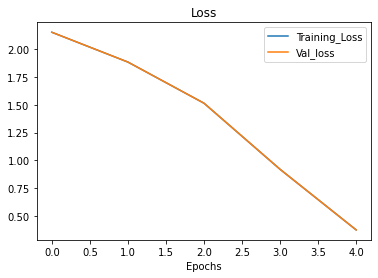

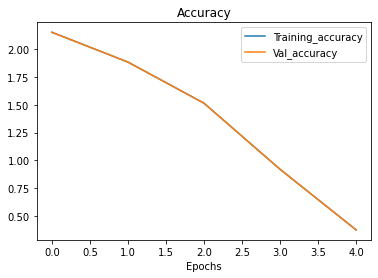

In [104]:
# Check our Model Loss Curves 

plot_loss_curves(history_11)


It Seems Our Model Is Performing Overfitting

# **Adjust Model Hyperparameters**


Due to its performance on training data, it is Clear that our model is learning Something

So, Lets Try and Fix Overfitting By :  

1- Get More Data

2- Simplify The Model

3- Use Data Augmentation

4- Use Transfer Learning



In [105]:
# How About we Try to simplify the model first

model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [106]:
#  Lets Try to Remove 2 Convolutional Layers

model_12 = Sequential([
                       Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
                       MaxPool2D(),
                       Conv2D(10,3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

model_12.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)


history_12 = model_12.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 292ms/step - loss: 2.1793 - accuracy: 0.2367 - val_loss: 2.0163 - val_accuracy: 0.2800
Epoch 2/5
235/235 [==============================] - 66s 278ms/step - loss: 1.8226 - accuracy: 0.3739 - val_loss: 1.9022 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 68s 291ms/step - loss: 1.4377 - accuracy: 0.5224 - val_loss: 1.9653 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 67s 285ms/step - loss: 0.9529 - accuracy: 0.7043 - val_loss: 2.2234 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 58s 246ms/step - loss: 0.5320 - accuracy: 0.8453 - val_loss: 2.6862 - val_accuracy: 0.3032


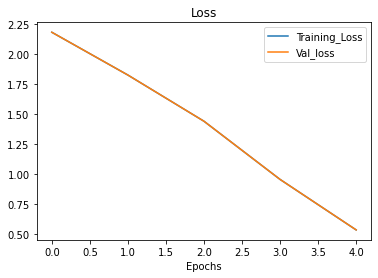

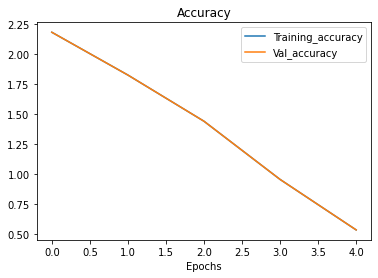

In [107]:
# Check Out Lost Curves 

plot_loss_curves(history_12)

In [108]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 29160)             0         
                                                                 
 dense_27 (Dense)            (None, 10)              

**Looks Like Our Model Didnot Work Well** 

# **Data Augmentation For Reduce Overfitting**

Lets Try and improve model results by using data Augmentation

ideally we want to  :  


*   Reduce Overfitting
*   Improve Validation Accuracy
*  Create Augmented Data generator



In [121]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255. ,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip = True)


In [122]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,target_size=(224,224,3), batch_size=32, class_mode= 'categorical',
)

Found 7500 images belonging to 10 classes.


# **Lets Create Another Model**

In [124]:
model_13 = tf.keras.models.clone_model(model_10)

# **Compile The Model**

In [125]:
model_13.compile(
    loss= 'categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)



In [126]:
model_13.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 218, 218, 10)      1480      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 109, 109, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 107, 107, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 51, 51, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 10)      

In [127]:
# Fit The Model

history_13 = model_13.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data= test_data, validation_steps= len(test_data))

ValueError: ignored

# **Repeat Until Satisfied**

**We could Keep here ... Continually Trying to bring TogetherOur loss curves Closer Together and Trying to Improve Validation and Test Accuracy**


How:

1- Restricting Model Architecture

2- Adusting Learning rate

3- Try Different Methods Of Data Augmentation

4- Training For Longer

5- Try Transfer Learning 


# **Make Predictions With Our Trained Model**

Lets Use our Trained Data To Make Sure Predictions Of Some random Images



In [128]:
# Remind Class Name
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [129]:
# Download Custom Images

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


--2022-01-31 09:34:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.08s   

2022-01-31 09:34:24 (44.4 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-01-31 09:34:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

# **Function For Multiclass Image Classification**

In [131]:
def pred_and_plot(model, filename, class_names= class_names):

  #  Import The Target image and Preprocess it

  img = load_and_prep_image(filename)

  # Make A Predictions

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:

    pred_class = class_names[tf.argmax(pred[0])]
  else:
    
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot The Image And Predicted Class

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);


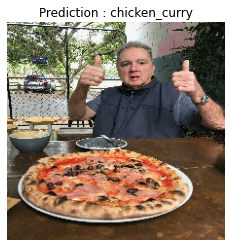

In [133]:
# Make A Prediction Using Model_13

pred_and_plot(model=model_13, filename='03-pizza-dad.jpeg', class_names = class_names )

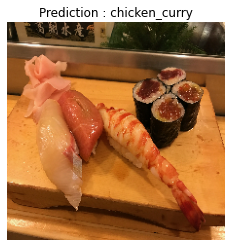

In [138]:
pred_and_plot(model= model_13, filename='03-sushi.jpeg', class_names= class_names)

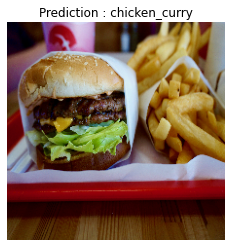

In [139]:
pred_and_plot(model=model_13, filename = '03-hamburger.jpeg', class_names = class_names)

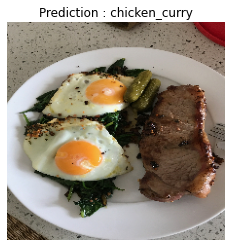

In [141]:
pred_and_plot(model=model_13, filename= '03-steak.jpeg', class_names= class_names)

# **Saving And Loading Our CNN Model**

In [142]:
model_13.save('save_model_13')

INFO:tensorflow:Assets written to: save_model_13/assets


# **Load Nad Evaluate The CNN Model**

In [143]:
loaded_model = tf.keras.models.load_model('save_model_13')

In [144]:
# Compare Original Model and Loaded model

load_model = loaded_model.evaluate(test_data) 

79/79 [==============================] - 15s 195ms/step - loss: 2.3026 - accuracy: 0.9000


In [145]:
ori_model = model_13.evaluate(test_data)

79/79 [==============================] - 15s 193ms/step - loss: 2.3026 - accuracy: 0.9000


# **Congartulations! This Is End Of CNN and Computer Vision**